In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse






In [104]:
df = pd.read_csv('monthly-traffic-fatalities-in-on.csv')
df[['Month' , 'Fatalities']] = df['Month;fatalities'].str.split(';', expand=True) 

In [106]:
df.drop('Month;fatalities', inplace=True, axis=1)

In [108]:
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index)


In [112]:
df['Fatalities'] = df['Fatalities'].astype(int)

y = df['Fatalities']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

In [115]:
from statsmodels.tsa.api import ExponentialSmoothing

In [117]:
y_train.dtypes

dtype('int32')

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


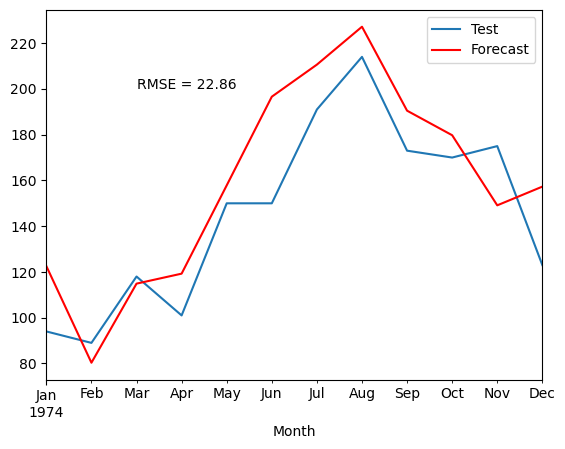

In [130]:
alpha, beta , gamma = 0.6,0.02, 0.6
ex = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add' , seasonal='mul')
fit1 = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
plt.text(50,200,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

## WGEM-IND_CPTOTNSXN dataset using holt trend and exponential method

In [231]:
# wg = pd.read_csv('WGEM-IND_CPTOTNSXN.csv', index_col=0)
# wg.index = pd.to_datetime(wg.index)

wg = pd.read_csv('WGEM-IND_CPTOTNSXN.csv')


In [233]:
from statsmodels.tsa.api import Holt , ExponentialSmoothing

In [235]:
y = wg['Value']
y_train = y.iloc[:-4]
y_test = y.iloc[-4:]

Object `plt.text(50,100,'RMSE = ' + str(round(rmse,2)))` not found.


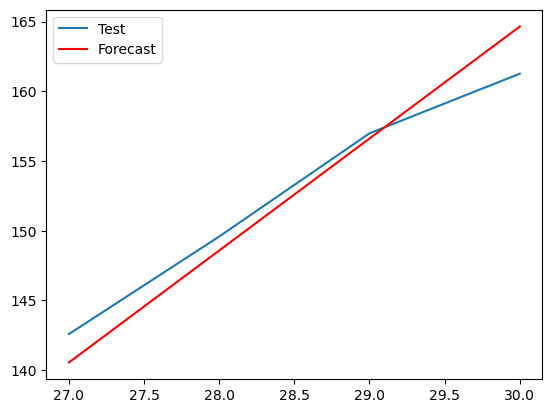

In [239]:
### with Holt Linear method
alpha, beta, gamma = 0.8,0.2, 0.6
ex = ExponentialSmoothing(y_train, seasonal_periods=1, trend = 'add')
fit1 = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
?plt.text(50,100,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


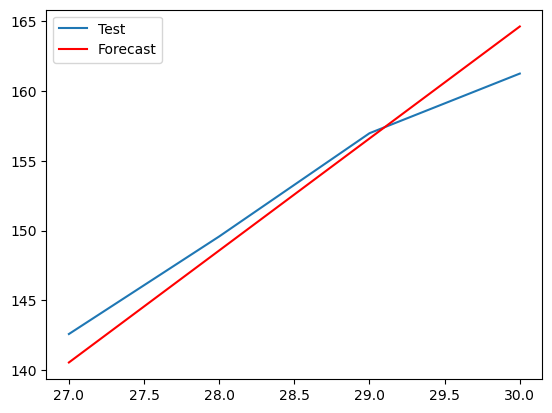

In [241]:
### with Holt Linear method
alpha, beta=0.8,0.2
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
y_test.plot(label='Test')
fcast1.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,fcast1))
# plt.text(50,100,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')

In [260]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0)

In [262]:
milk

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
...,...
1975-08,858
1975-09,817
1975-10,827


In [282]:
y = milk['Milk']

In [284]:
from statsmodels.tsa.stattools import adfuller

In [286]:
results = adfuller(milk['Milk'] , maxlag = 10)
print("p_value", results[1])
if results[1] < 0.05:
    print('Time series is Stationary')
else:
    print('Time Series is not Stationary')

p_value 0.6443832606930107
Time Series is not Stationary


In [288]:
results

(-1.2664390587629752,
 0.6443832606930107,
 10,
 157,
 {'1%': -3.472703119504854,
  '5%': -2.880131672353732,
  '10%': -2.5766826861130268},
 1479.4852153393908)

## First Order Differencing

In [295]:
diff_1 = y.diff(1)
diff_1.dropna(inplace=True)
diff_1
results = adfuller(diff_1, maxlag = 10)
print("p-value :" , results[1])

p-value : 0.0
